In [1]:
import shap
import pandas as pd
from pycaret import regression

shap.initjs()

In [2]:
# variables
model = 'hawkeye-hands-texture-fraction'
dataset_file = '2024-08-01_NT_Hawkeye-Hands-Texture-Features.csv'

In [5]:
# load dataset
features = pd.read_csv(dataset_file)
X = features.drop(columns=['Age'])

# load model
saved_experiment = regression.load_experiment(model, data=features)

# tune rf model
rf = regression.create_model('rf')
tuned_rf = regression.tune_model(rf, optimize='RMSE')

,Description,Value
0,Session id,42
1,Target,Age
2,Target type,Regression
3,Original data shape,"(576, 51)"
4,Transformed data shape,"(576, 51)"
5,Transformed train set shape,"(403, 51)"
6,Transformed test set shape,"(173, 51)"
7,Numeric features,50
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.9793,122.3377,11.0606,0.7437,0.2403,0.1909
1,7.7783,122.3773,11.0624,0.7041,0.4753,0.7170
2,14.9261,1106.8832,33.2699,-0.9785,0.5544,0.7475
3,15.1770,881.3272,29.6872,-0.6107,0.4294,0.4256
4,9.6520,157.8522,12.5639,0.6279,0.2692,0.2421
5,10.2530,200.0197,14.1428,0.6241,0.3102,0.2656
6,12.2955,250.9324,15.8408,0.6443,0.3262,0.2873
7,25.3017,12970.4625,113.8879,0.0719,0.4353,0.2126
8,8.1705,159.2243,12.6184,0.6003,0.2710,0.1923


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.3451,143.6063,11.9836,0.6991,0.2526,0.1923
1,10.1354,200.5629,14.1620,0.5150,0.5202,0.8600
2,11.0832,215.3313,14.6742,0.6151,0.4982,0.7070
3,11.0668,224.1145,14.9705,0.5904,0.3383,0.3014
4,9.5308,160.4695,12.6677,0.6217,0.2910,0.2516
5,10.5892,167.8503,12.9557,0.6846,0.2881,0.2684
6,14.0517,328.4487,18.1232,0.5345,0.3501,0.3088
7,27.3083,13021.3478,114.1111,0.0683,0.4672,0.2703
8,8.2140,145.5216,12.0632,0.6347,0.2723,0.2060


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [7]:
explainer = shap.Explainer(tuned_rf)
shap_values = explainer.shap_values(X)

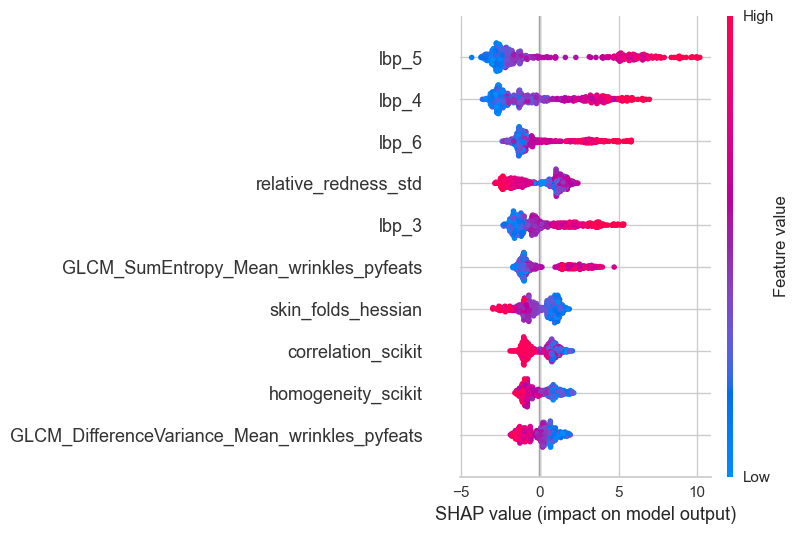

In [13]:
shap.summary_plot(shap_values=shap_values, 
                  features=X, 
                  max_display=10)